Лр 1 Описательная статистика, визуализация, предварительная обработка данных

Нормальное распределение.

https://rosstat.gov.ru/storage/mediabank/urov_11subg_nm.xlsx
УРОВЕНЬ ДЕНЕЖНЫХ ДОХОДОВ НАСЕЛЕНИЯ В ЦЕЛОМ ПО РОССИИ И ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2022 ГОД


In [ ]:
import pandas as pd
from matplotlib.pyplot import plot
import seaborn as sns
import numpy as np
import scipy
import statistics
from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/My Drive/dohod.xlsx')
data

,Регион,Доходы
0,Белгородская область,41855
1,Брянская область,37428
2,Владимирская область,34667
3,Воронежская область,41156
4,Ивановская область,36509
...,...,...
82,Амурская область,49798
83,Магаданская область,101999
84,Сахалинская область,79322
85,Еврейская автономная область,37753


In [ ]:
values = data['Доходы']
median_value = values.median()
range_value = values.max() - values.min()
shifted_median_pos = median_value + 0.15 * range_value
shifted_median_neg = median_value - 0.15 * range_value
mean_value = values.mean()
mode_value = values.mode().iloc[0]
skew_value = values.skew()

In [ ]:
print(f"Среднее: {mean_value}")
print(f"Медиана: {median_value}")
print(f"Смещение: {skew_value}")
print(f"Мода: {mode_value}")
print(f"Размах: {range_value}")
print(f"Смещенная медиана (+15% размаха): {shifted_median_pos}")
print(f"Смещенная медиана (-15% размаха): {shifted_median_neg}")

Среднее: 44173.0459770115
Медиана: 37428.0
Смещение: 2.6148626711927987
Мода: 23035
Размах: 115126
Смещенная медиана (+15% размаха): 54696.899999999994
Смещенная медиана (-15% размаха): 20159.100000000002


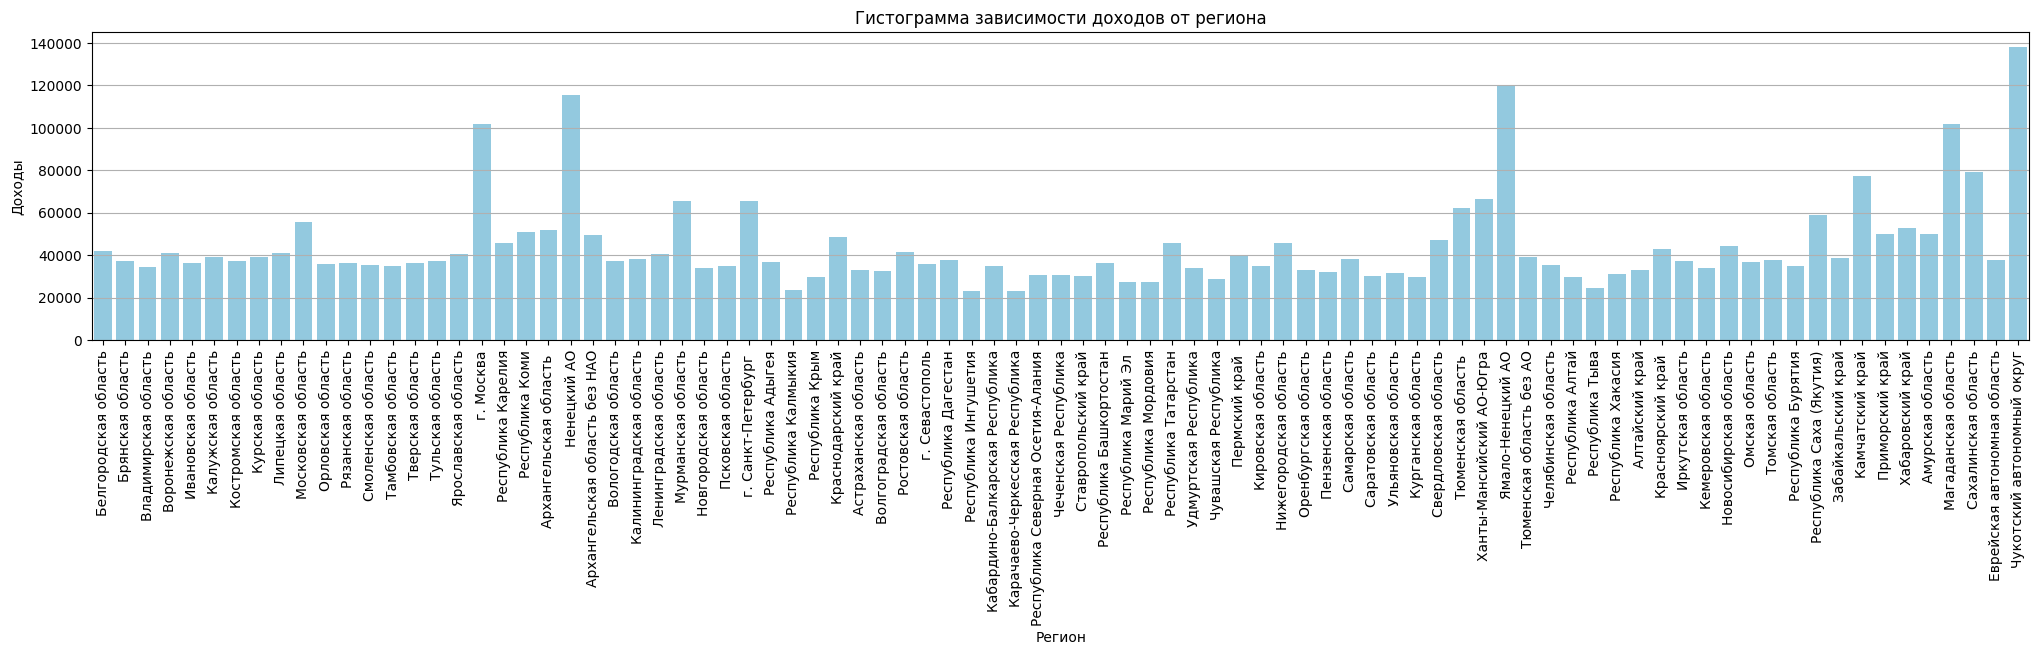

In [ ]:
plt.figure(figsize=(25, 4))
sns.barplot(x=data['Регион'], y=data['Доходы'], color='skyblue')
plt.title('Гистограмма зависимости доходов от региона')
plt.xlabel('Регион')
plt.ylabel('Доходы')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


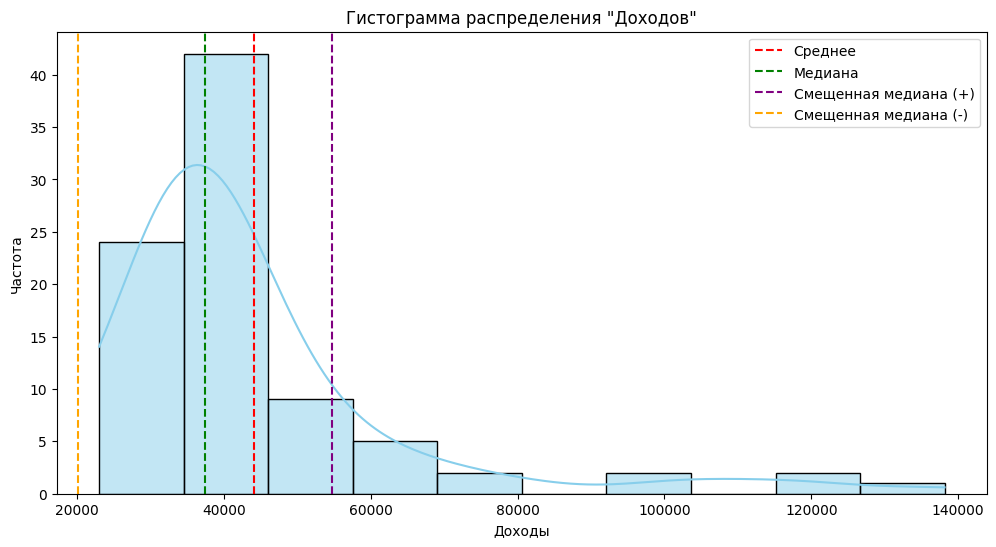

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(values, bins=10, kde=True, color='skyblue')
plt.axvline(mean_value, color='red', linestyle='--', label='Среднее')
plt.axvline(median_value, color='green', linestyle='--', label='Медиана')
plt.axvline(shifted_median_pos, color='purple', linestyle='--', label='Смещенная медиана (+)')
plt.axvline(shifted_median_neg, color='orange', linestyle='--', label='Смещенная медиана (-)')
plt.legend()
plt.title('Гистограмма распределения "Доходов"')
plt.xlabel('Доходы')
plt.ylabel('Частота')
plt.show()

Распределение получилось асимметричным из-за существования МРОТ.

Соответственно средний уровень доходов не может быть близок к 0.

Равномерное распределение. Количество разводов в разных годах. Статистика взята: https://rosstat.gov.ru/storage/mediabank/demo32_2022.xls

In [ ]:
dt = pd.read_excel('/content/drive/My Drive/razvod.xlsx')
dt

,Год,Единиц
0,2000,627703
1,2001,763493
2,2002,853647
3,2003,798824
4,2004,635835
5,2005,604942
6,2006,640837
7,2007,685910
8,2008,703412
9,2009,699430


In [ ]:
values = dt['Единиц']

# 1. Распределение со смещенной медианой
median_value = values.median()
range_value = values.max() - values.min()
shifted_median_pos = median_value + 0.15 * range_value
shifted_median_neg = median_value - 0.15 * range_value
skew_value = values.skew()
# 2. Описательные статистики
mean_value = values.mean()
mode_value = values.mode().iloc[0]

In [ ]:
print(f"Среднее: {mean_value}")
print(f"Медиана: {median_value}")
print(f"Мода: {mode_value}")
print(f"Смещение: {skew_value}")
print(f"Размах: {range_value}")
print(f"Смещенная медиана (+15% размаха): {shifted_median_pos}")
print(f"Смещенная медиана (-15% размаха): {shifted_median_neg}")

Среднее: 663321.0869565217
Медиана: 644101.0
Мода: 564704
Смещение: 1.2861777723547039
Размах: 288943
Смещенная медиана (+15% размаха): 687442.45
Смещенная медиана (-15% размаха): 600759.55


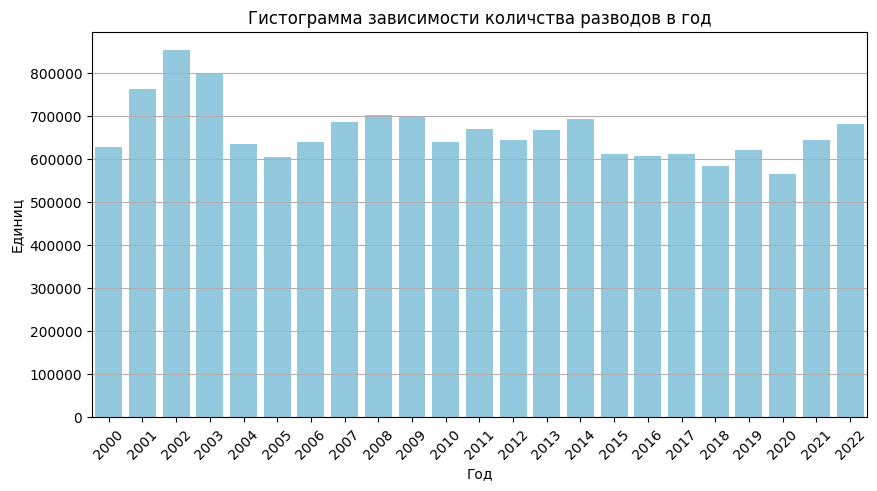

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=dt['Год'], y=dt['Единиц'], color='skyblue')
plt.title('Гистограмма зависимости количства разводов в год')
plt.xlabel('Год')
plt.ylabel('Единиц')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

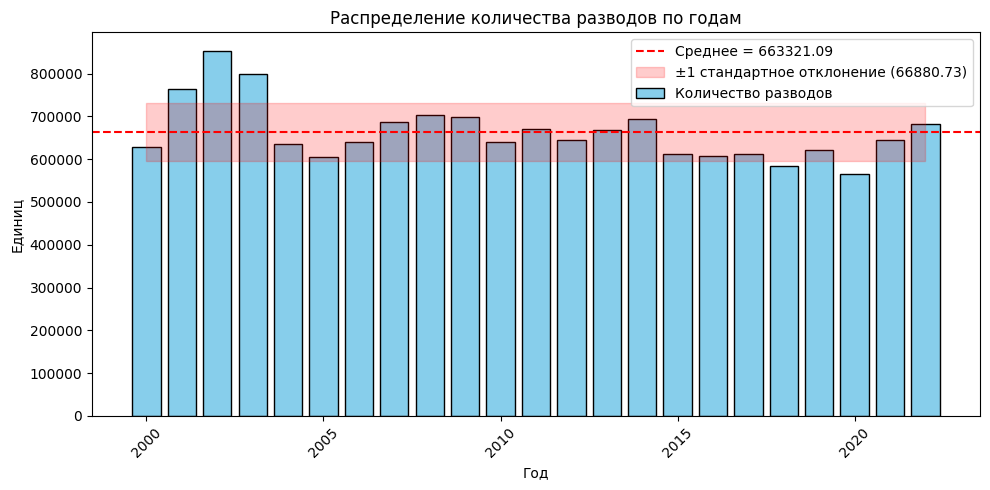

In [ ]:
mean_value = np.mean(dt["Единиц"])
std_value = np.std(dt["Единиц"])
plt.figure(figsize=(10, 5))
plt.bar(dt["Год"], dt["Единиц"], color='skyblue', edgecolor='black', label="Количество разводов")
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Среднее = {mean_value:.2f}')
plt.fill_between(dt["Год"], mean_value - std_value, mean_value + std_value, color='r', alpha=0.2, label=f'±1 стандартное отклонение ({std_value:.2f})')
plt.xlabel('Год')
plt.ylabel('Единиц')
plt.title('Распределение количества разводов по годам')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Наблюдаем очень печальну картину по разводам в Российской Федерации :/

Часть 2. Аномальные значения

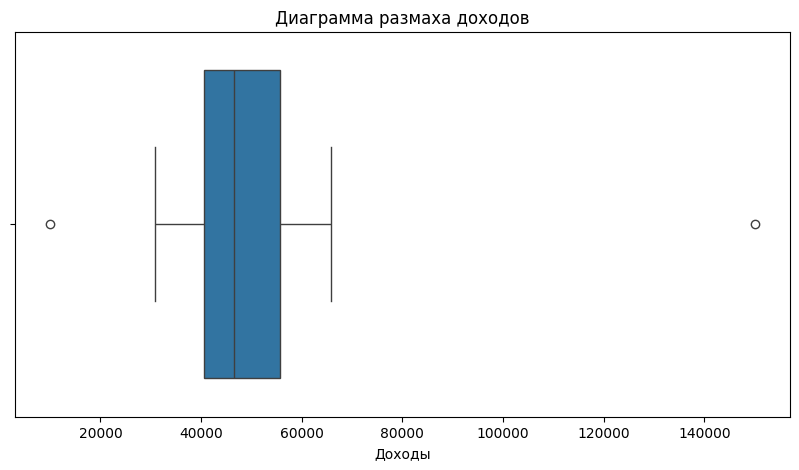

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем синтетический датасет
np.random.seed(42)
data = {
    "Регион": [f"Регион {i}" for i in range(1, 21)],
    "Доходы": np.random.normal(loc=50000, scale=10000, size=20).tolist()
}
# Добавляем аномальные значения
data["Доходы"][5] = 150000  # Аномальный высокий доход
data["Доходы"][12] = 10000  # Аномальный низкий доход

df = pd.DataFrame(data)

# Построение "ящика с усами"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Доходы"])
plt.title("Диаграмма размаха доходов")
plt.xlabel("Доходы")
plt.show()


На диаграмме размаха мы видим аномальные значения:

Высокий доход: Мог быть вызван неточностью ввода данных или наличием сверхбогатых людей.

Низкий доход: Может указывать на ошибки в данных или представлять бедный регион.

In [2]:
# Синтетический признак: отнесение доходов к среднему значению
df['Отклонение от среднего'] = abs(df['Доходы'] - df['Доходы'].mean())

# Корреляционный анализ
correlation = df[['Доходы', 'Отклонение от среднего']].corr()
print("Корреляционная матрица:")
print(correlation)


Корреляционная матрица:
                          Доходы  Отклонение от среднего
Доходы                  1.000000                0.652382
Отклонение от среднего  0.652382                1.000000
